# TSUI Index 시각화

TSUI 지수 결과를 차트로 시각화합니다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pathlib import Path
import numpy as np

# 한글 폰트 설정 (macOS)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 디렉토리 경로
base_dir = Path.cwd()
data_dir = base_dir / 'data'

print(f"데이터 디렉토리: {data_dir}")

데이터 디렉토리: /Users/jack/Study/develop/EST/est_team_project/trumph_index/application/index_generator/data


In [2]:
# 1기, 2기 데이터 로드
term1_csv = data_dir / 'tsui_index_term1_2017-2021.csv'
term2_csv = data_dir / 'tsui_index_term2_2025-now.csv'

df_term1 = None
df_term2 = None

if term1_csv.exists():
    df_term1 = pd.read_csv(term1_csv)
    df_term1['date'] = pd.to_datetime(df_term1['date'])
    df_term1 = df_term1.sort_values('date')
    print(f"1기 데이터: {len(df_term1)}일 ({df_term1['date'].min().date()} ~ {df_term1['date'].max().date()})")
else:
    print(f"❌ 파일 없음: {term1_csv}")

if term2_csv.exists():
    df_term2 = pd.read_csv(term2_csv)
    df_term2['date'] = pd.to_datetime(df_term2['date'])
    df_term2 = df_term2.sort_values('date')
    print(f"2기 데이터: {len(df_term2)}일 ({df_term2['date'].min().date()} ~ {df_term2['date'].max().date()})")
else:
    print(f"❌ 파일 없음: {term2_csv}")

1기 데이터: 1450일 (2017-01-20 ~ 2021-01-08)
2기 데이터: 346일 (2025-01-20 ~ 2025-12-31)


In [3]:
# 기본 통계 정보
if df_term1 is not None:
    print("=" * 60)
    print("1기 (2017-2021) 통계")
    print("=" * 60)
    print(f"tsui_index - 평균: {df_term1['tsui_index'].mean():.2f}, 중앙값: {df_term1['tsui_index'].median():.2f}")
    print(f"tsui_index - 최소: {df_term1['tsui_index'].min():.2f}, 최대: {df_term1['tsui_index'].max():.2f}")
    print(f"tsui_index - 표준편차: {df_term1['tsui_index'].std():.2f}")
    baseline_row = df_term1[df_term1['date'] == '2017-01-20']
    if len(baseline_row) > 0:
        print(f"\n기준일 (2017-01-20) tsui_index: {baseline_row['tsui_index'].values[0]:.4f}")
        print(f"기준일 raw_tsui_index: {baseline_row['raw_tsui_index'].values[0]:.4f}")

if df_term2 is not None:
    print("\n" + "=" * 60)
    print("2기 (2025-now) 통계")
    print("=" * 60)
    print(f"tsui_index - 평균: {df_term2['tsui_index'].mean():.2f}, 중앙값: {df_term2['tsui_index'].median():.2f}")
    print(f"tsui_index - 최소: {df_term2['tsui_index'].min():.2f}, 최대: {df_term2['tsui_index'].max():.2f}")
    print(f"tsui_index - 표준편차: {df_term2['tsui_index'].std():.2f}")
    baseline_rows = df_term2[df_term2['date'] >= '2025-01-20']
    if len(baseline_rows) > 0:
        baseline_date = baseline_rows.iloc[0]['date']
        baseline_row = df_term2[df_term2['date'] == baseline_date]
        print(f"\n기준일 ({baseline_date.date()}) tsui_index: {baseline_row['tsui_index'].values[0]:.4f}")
        print(f"기준일 raw_tsui_index: {baseline_row['raw_tsui_index'].values[0]:.4f}")

1기 (2017-2021) 통계
tsui_index - 평균: 699.93, 중앙값: 687.57
tsui_index - 최소: 59.44, 최대: 1616.76
tsui_index - 표준편차: 280.70

기준일 (2017-01-20) tsui_index: 100.0000
기준일 raw_tsui_index: 100.0000

2기 (2025-now) 통계
tsui_index - 평균: 455.63, 중앙값: 451.70
tsui_index - 최소: 100.00, 최대: 758.64
tsui_index - 표준편차: 100.96

기준일 (2025-01-20) tsui_index: 100.0000
기준일 raw_tsui_index: 100.0000


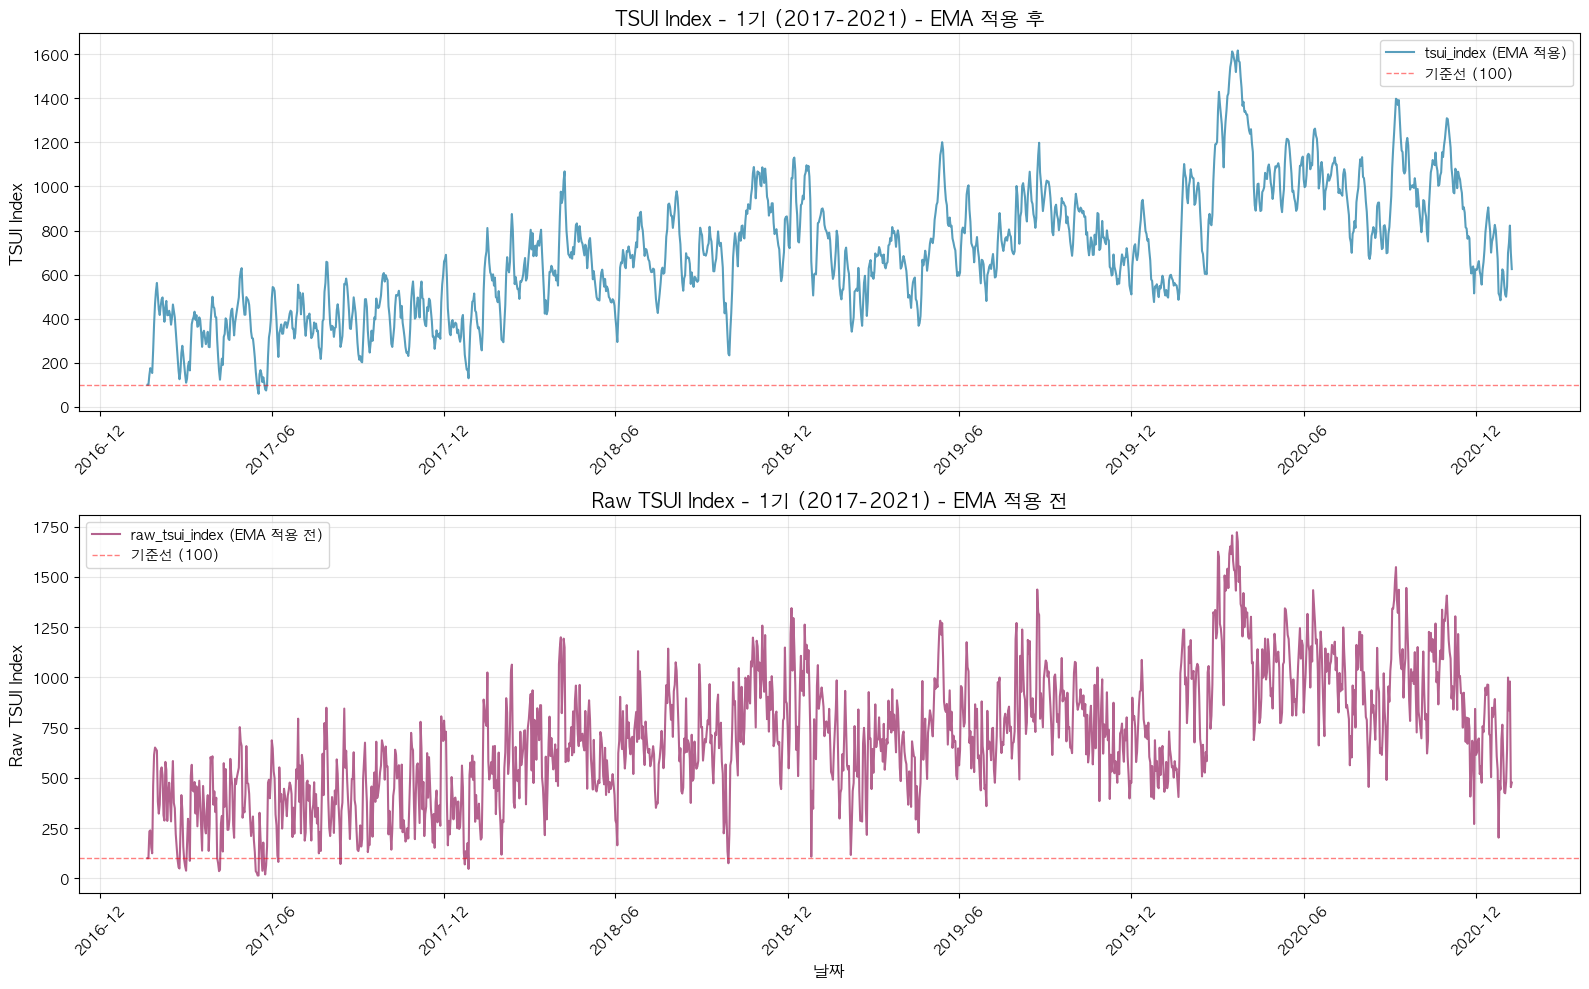

In [4]:
# 1기 차트: tsui_index와 raw_tsui_index 비교
if df_term1 is not None:
    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    
    # 상단: tsui_index (EMA 적용 후)
    ax1 = axes[0]
    ax1.plot(df_term1['date'], df_term1['tsui_index'], label='tsui_index (EMA 적용)', 
             linewidth=1.5, color='#2E86AB', alpha=0.8)
    ax1.axhline(y=100, color='r', linestyle='--', linewidth=1, alpha=0.5, label='기준선 (100)')
    ax1.set_title('TSUI Index - 1기 (2017-2021) - EMA 적용 후', fontsize=14, fontweight='bold')
    ax1.set_ylabel('TSUI Index', fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    
    # 하단: raw_tsui_index (EMA 적용 전)
    ax2 = axes[1]
    ax2.plot(df_term1['date'], df_term1['raw_tsui_index'], label='raw_tsui_index (EMA 적용 전)', 
             linewidth=1.5, color='#A23B72', alpha=0.8)
    ax2.axhline(y=100, color='r', linestyle='--', linewidth=1, alpha=0.5, label='기준선 (100)')
    ax2.set_title('Raw TSUI Index - 1기 (2017-2021) - EMA 적용 전', fontsize=14, fontweight='bold')
    ax2.set_xlabel('날짜', fontsize=12)
    ax2.set_ylabel('Raw TSUI Index', fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()

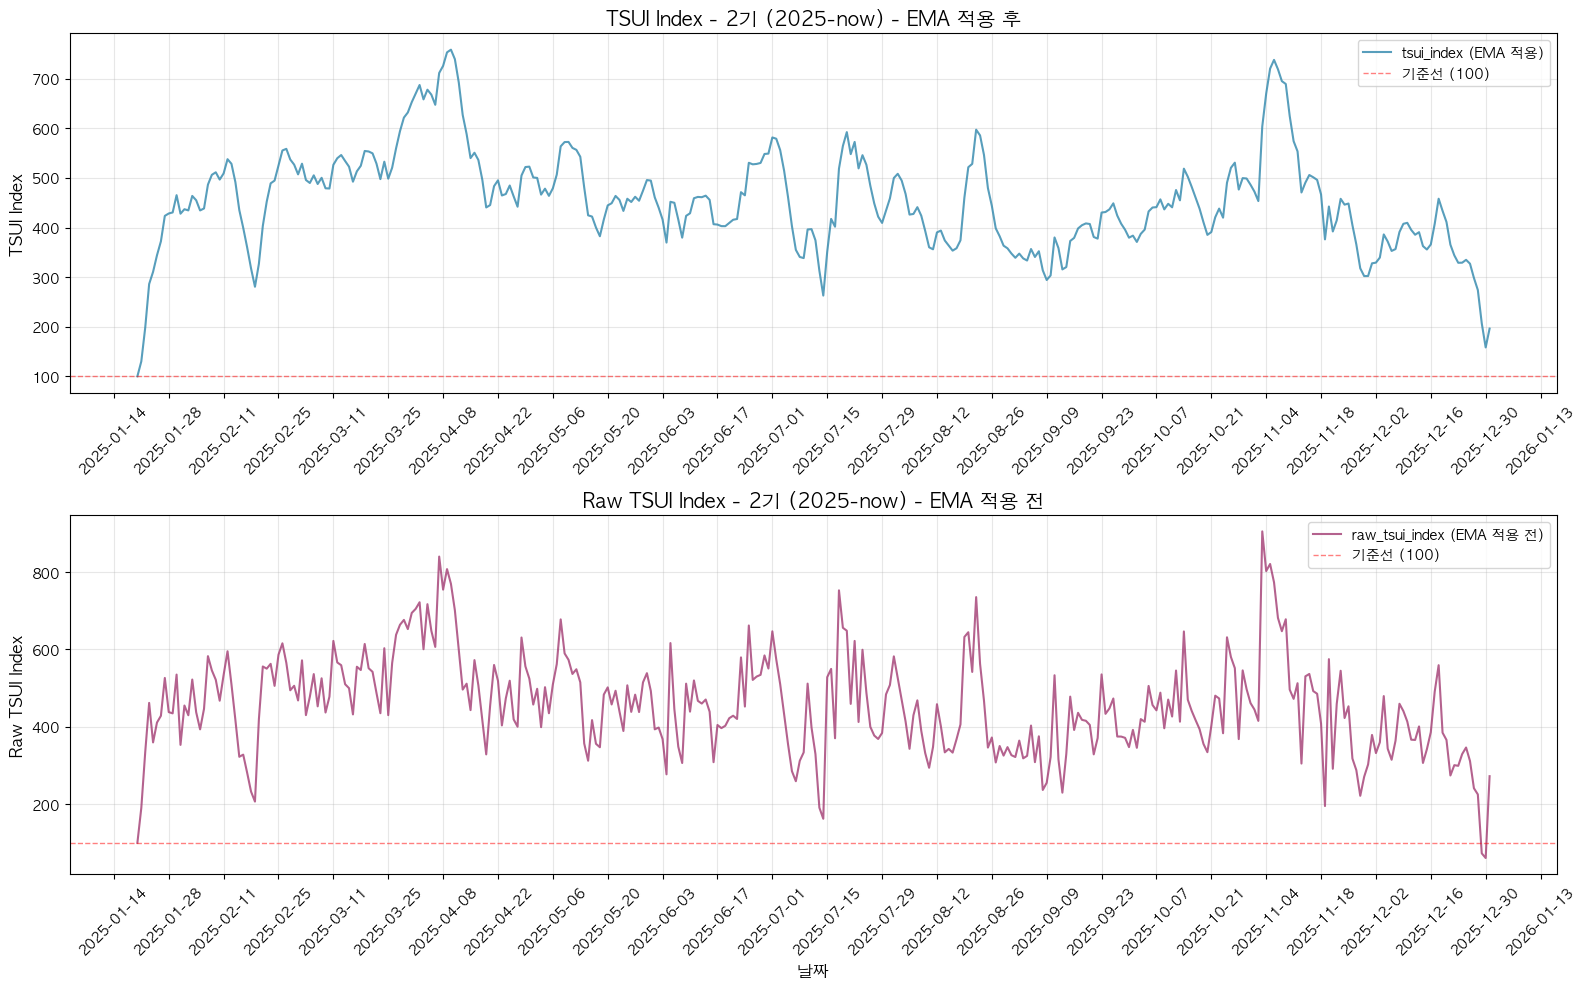

In [5]:
# 2기 차트: tsui_index와 raw_tsui_index 비교
if df_term2 is not None:
    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    
    # 상단: tsui_index (EMA 적용 후)
    ax1 = axes[0]
    ax1.plot(df_term2['date'], df_term2['tsui_index'], label='tsui_index (EMA 적용)', 
             linewidth=1.5, color='#2E86AB', alpha=0.8)
    ax1.axhline(y=100, color='r', linestyle='--', linewidth=1, alpha=0.5, label='기준선 (100)')
    ax1.set_title('TSUI Index - 2기 (2025-now) - EMA 적용 후', fontsize=14, fontweight='bold')
    ax1.set_ylabel('TSUI Index', fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    
    # 하단: raw_tsui_index (EMA 적용 전)
    ax2 = axes[1]
    ax2.plot(df_term2['date'], df_term2['raw_tsui_index'], label='raw_tsui_index (EMA 적용 전)', 
             linewidth=1.5, color='#A23B72', alpha=0.8)
    ax2.axhline(y=100, color='r', linestyle='--', linewidth=1, alpha=0.5, label='기준선 (100)')
    ax2.set_title('Raw TSUI Index - 2기 (2025-now) - EMA 적용 전', fontsize=14, fontweight='bold')
    ax2.set_xlabel('날짜', fontsize=12)
    ax2.set_ylabel('Raw TSUI Index', fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()

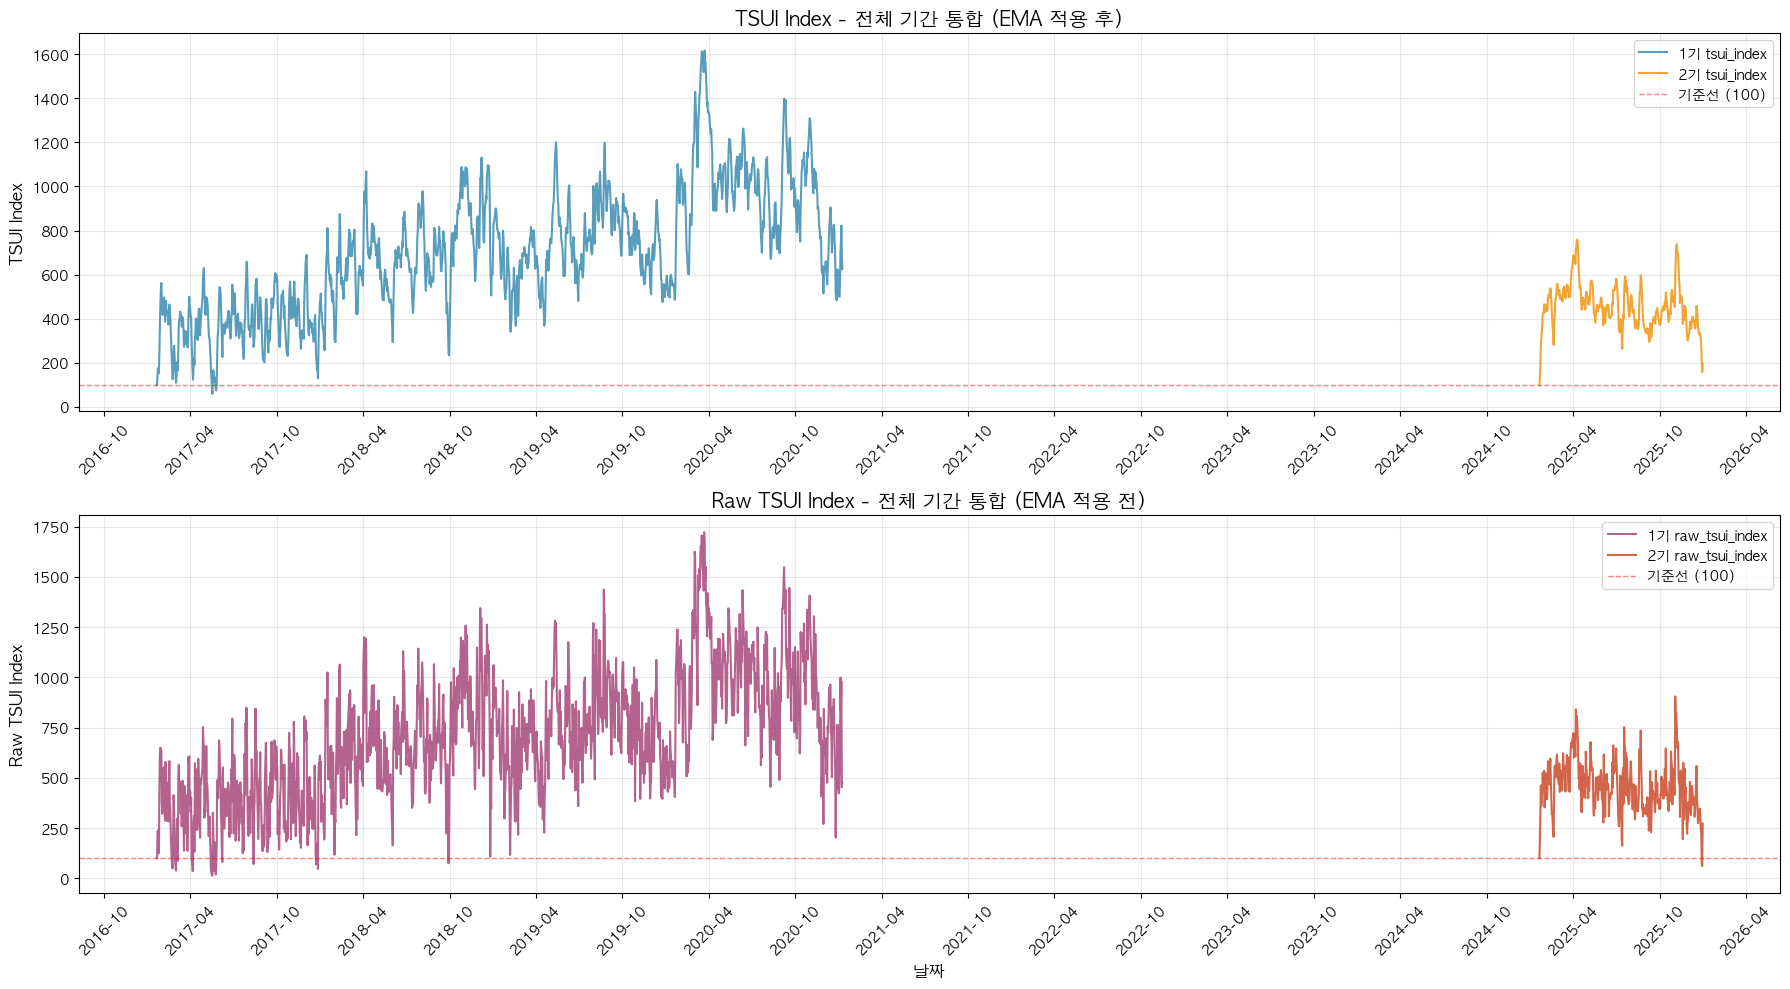

In [6]:
# 통합 차트: 1기와 2기를 하나의 차트에 표시
fig, axes = plt.subplots(2, 1, figsize=(18, 10))

# 상단: tsui_index 통합
ax1 = axes[0]
if df_term1 is not None:
    ax1.plot(df_term1['date'], df_term1['tsui_index'], label='1기 tsui_index', 
             linewidth=1.5, color='#2E86AB', alpha=0.8)
if df_term2 is not None:
    ax1.plot(df_term2['date'], df_term2['tsui_index'], label='2기 tsui_index', 
             linewidth=1.5, color='#F18F01', alpha=0.8)
ax1.axhline(y=100, color='r', linestyle='--', linewidth=1, alpha=0.5, label='기준선 (100)')
ax1.set_title('TSUI Index - 전체 기간 통합 (EMA 적용 후)', fontsize=14, fontweight='bold')
ax1.set_ylabel('TSUI Index', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

# 하단: raw_tsui_index 통합
ax2 = axes[1]
if df_term1 is not None:
    ax2.plot(df_term1['date'], df_term1['raw_tsui_index'], label='1기 raw_tsui_index', 
             linewidth=1.5, color='#A23B72', alpha=0.8)
if df_term2 is not None:
    ax2.plot(df_term2['date'], df_term2['raw_tsui_index'], label='2기 raw_tsui_index', 
             linewidth=1.5, color='#C73E1D', alpha=0.8)
ax2.axhline(y=100, color='r', linestyle='--', linewidth=1, alpha=0.5, label='기준선 (100)')
ax2.set_title('Raw TSUI Index - 전체 기간 통합 (EMA 적용 전)', fontsize=14, fontweight='bold')
ax2.set_xlabel('날짜', fontsize=12)
ax2.set_ylabel('Raw TSUI Index', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [7]:
# 전일 대비 변화율 분석
if df_term1 is not None:
    df_term1['daily_change'] = df_term1['tsui_index'].diff()
    df_term1['daily_change_pct'] = df_term1['tsui_index'].pct_change() * 100
    
    print("=" * 60)
    print("1기 전일 대비 변화 분석")
    print("=" * 60)
    print(f"평균 일일 변화: {df_term1['daily_change'].mean():.2f} 포인트")
    print(f"최대 상승: {df_term1['daily_change'].max():.2f} 포인트")
    print(f"최대 하락: {df_term1['daily_change'].min():.2f} 포인트")
    print(f"표준편차: {df_term1['daily_change'].std():.2f} 포인트")
    print(f"\n25포인트 이상 변화한 날: {len(df_term1[abs(df_term1['daily_change']) >= 25])}일")
    if len(df_term1[abs(df_term1['daily_change']) >= 25]) > 0:
        print("\n25포인트 이상 변화한 날짜:")
        large_changes = df_term1[abs(df_term1['daily_change']) >= 25][['date', 'tsui_index', 'daily_change']]
        print(large_changes.to_string(index=False))

if df_term2 is not None:
    df_term2['daily_change'] = df_term2['tsui_index'].diff()
    df_term2['daily_change_pct'] = df_term2['tsui_index'].pct_change() * 100
    
    print("\n" + "=" * 60)
    print("2기 전일 대비 변화 분석")
    print("=" * 60)
    print(f"평균 일일 변화: {df_term2['daily_change'].mean():.2f} 포인트")
    print(f"최대 상승: {df_term2['daily_change'].max():.2f} 포인트")
    print(f"최대 하락: {df_term2['daily_change'].min():.2f} 포인트")
    print(f"표준편차: {df_term2['daily_change'].std():.2f} 포인트")
    print(f"\n25포인트 이상 변화한 날: {len(df_term2[abs(df_term2['daily_change']) >= 25])}일")
    if len(df_term2[abs(df_term2['daily_change']) >= 25]) > 0:
        print("\n25포인트 이상 변화한 날짜:")
        large_changes = df_term2[abs(df_term2['daily_change']) >= 25][['date', 'tsui_index', 'daily_change']]
        print(large_changes.to_string(index=False))

1기 전일 대비 변화 분석
평균 일일 변화: 0.36 포인트
최대 상승: 193.35 포인트
최대 하락: -276.19 포인트
표준편차: 58.21 포인트

25포인트 이상 변화한 날: 963일

25포인트 이상 변화한 날짜:
      date  tsui_index  daily_change
2017-01-22    144.4390       44.4357
2017-01-23    175.7517       31.3127
2017-01-26    255.7459      102.0305
2017-01-27    375.3743      119.6284
2017-01-28    467.1860       91.8117
2017-01-29    525.8254       58.6394
2017-01-30    562.3427       36.5173
2017-01-31    501.9828      -60.3599
2017-02-01    441.9411      -60.0417
2017-02-02    416.8164      -25.1247
2017-02-03    456.1110       39.2946
2017-02-04    488.1325       32.0215
2017-02-06    435.6403      -60.9487
2017-02-07    386.1799      -49.4604
2017-02-08    450.6033       64.4234
2017-02-09    480.6637       30.0604
2017-02-10    415.6386      -65.0251
2017-02-14    372.9367      -44.9459
2017-02-15    404.7301       31.7934
2017-02-16    464.3728       59.6427
2017-02-17    434.5651      -29.8077
2017-02-18    406.0549      -28.5102
2017-02-19    344.0926

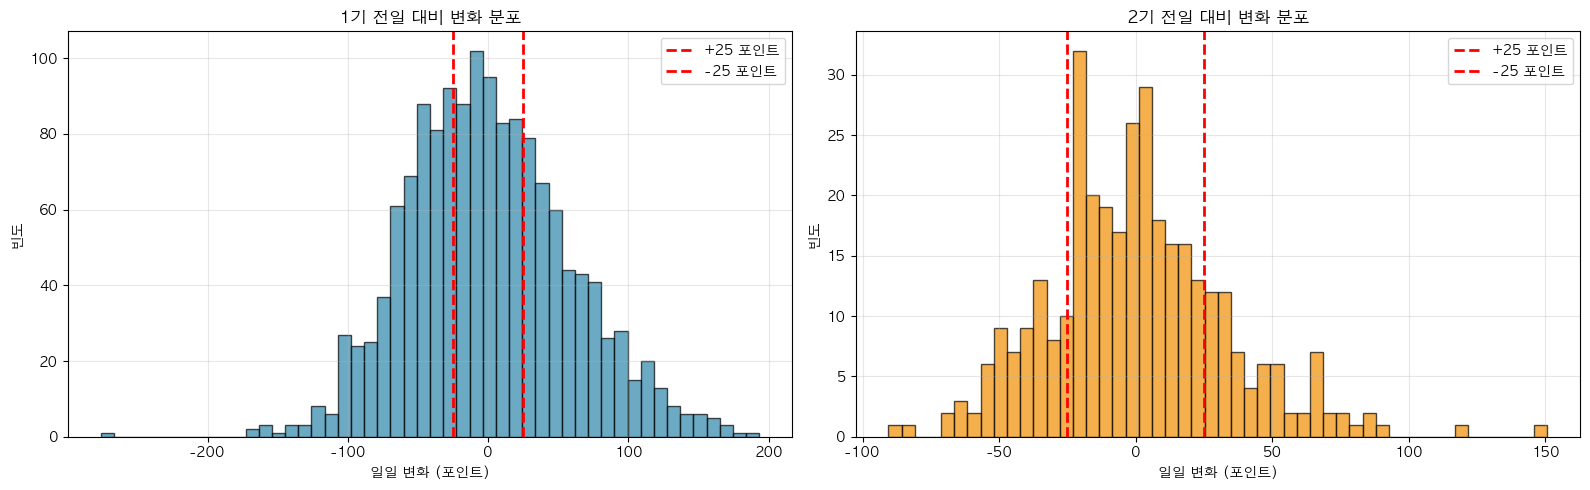

In [8]:
# 전일 대비 변화율 히스토그램
if df_term1 is not None and df_term2 is not None:
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # 1기 히스토그램
    ax1 = axes[0]
    ax1.hist(df_term1['daily_change'].dropna(), bins=50, color='#2E86AB', alpha=0.7, edgecolor='black')
    ax1.axvline(x=25, color='r', linestyle='--', linewidth=2, label='+25 포인트')
    ax1.axvline(x=-25, color='r', linestyle='--', linewidth=2, label='-25 포인트')
    ax1.set_title('1기 전일 대비 변화 분포', fontsize=12, fontweight='bold')
    ax1.set_xlabel('일일 변화 (포인트)', fontsize=10)
    ax1.set_ylabel('빈도', fontsize=10)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # 2기 히스토그램
    ax2 = axes[1]
    ax2.hist(df_term2['daily_change'].dropna(), bins=50, color='#F18F01', alpha=0.7, edgecolor='black')
    ax2.axvline(x=25, color='r', linestyle='--', linewidth=2, label='+25 포인트')
    ax2.axvline(x=-25, color='r', linestyle='--', linewidth=2, label='-25 포인트')
    ax2.set_title('2기 전일 대비 변화 분포', fontsize=12, fontweight='bold')
    ax2.set_xlabel('일일 변화 (포인트)', fontsize=10)
    ax2.set_ylabel('빈도', fontsize=10)
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()